In [1]:
%matplotlib inline

In [2]:
import numpy as np, pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
filenames = glob.glob('new*.txt')
filenames.sort()
filenames

['new1en10.txt',
 'new1en11.txt',
 'new1en12.txt',
 'new1en13.txt',
 'new1en14.txt']

In [3]:
csvs = [pd.read_csv(filen).as_matrix() for filen in filenames]

In [114]:
def norm(x, axis=None):
    return np.sqrt(np.sum(np.array(x)**2, axis=axis))

In [4]:
data = []
for cs in csvs:
    ldata = []
    cs2 = cs[3::4]
    print(cs2)
    for thing in cs2:
        num = float(list(thing)[0].split(':')[1].strip())
        ldata.append(num)
    data.append(ldata)

[['Iterations per second: 26.68']
 ['Iterations per second: 26.91']
 ['Iterations per second: 25.13']]
[['Iterations per second: 25.55']
 ['Iterations per second: 25.19']
 ['Iterations per second: 21.87']
 ['Iterations per second: 24.30']
 ['Iterations per second: 25.59']]
[['Iterations per second: 16.10']
 ['Iterations per second: 16.09']
 ['Iterations per second: 14.78']]
[['Iterations per second: 10.29']
 ['Iterations per second: 10.53']
 ['Iterations per second: 10.35']
 ['Iterations per second: 8.59']
 ['Iterations per second: 10.01']]
[['Iterations per second: 8.48']
 ['Iterations per second: 8.53']
 ['Iterations per second: 8.95']
 ['Iterations per second: 8.92']
 ['Iterations per second: 6.86']
 ['Iterations per second: 8.49']]


In [5]:
data

[[26.68, 26.91, 25.13],
 [25.55, 25.19, 21.87, 24.3, 25.59],
 [16.1, 16.09, 14.78],
 [10.29, 10.53, 10.35, 8.59, 10.01],
 [8.48, 8.53, 8.95, 8.92, 6.86, 8.49]]

In [6]:
avgs = [np.mean(lst) for lst in data]

In [7]:
avgs

[26.239999999999998,
 24.5,
 15.656666666666666,
 9.9540000000000006,
 8.3716666666666661]

In [11]:
speeds = pd.read_csv('data/bogo1.csv', skiprows=0, header=None)
speeds.head()

,0
0,232.169649
1,209.955610
2,251.186667
3,54.994616
4,123.843749


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266f87bac8>]], dtype=object)

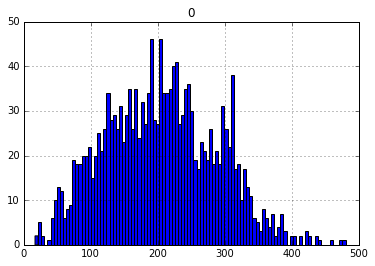

In [24]:
speeds.hist(bins=100)

In [25]:
print(speeds.mean(), speeds.median())

0    204.63248
dtype: float64 0    203.865126
dtype: float64


In [30]:
speed2 = pd.read_csv('speeds.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266f533f98>]], dtype=object)

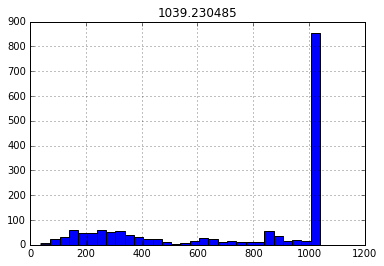

In [31]:
speed2.hist(bins=30)

In [32]:
speed2 = pd.read_csv('speeds.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266f466cc0>]], dtype=object)

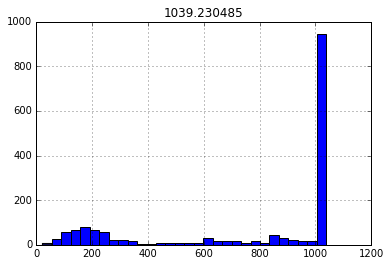

In [33]:
speed2.hist(bins=30)

In [43]:
norm([295.,]*3)

510.95498823281878

In [44]:
np.amax(speed2)

1039.230485    1039.230485
dtype: float64

In [94]:
import hashlib
import struct
 
 
class GRandom:
    def __init__(self):
        self.audio = open("/dev/urandom","rb")
        self.hash = hashlib.md5()
 
    def get_raw_block(self):
        buffer = self.audio.read(self.hash.block_size*8)
        bytes = struct.unpack("%iB"%len(buffer), buffer)
 
        longs = []
        for i in range(self.hash.block_size//4):
            temp = 0
            for b in bytes[i*32:(i+1)*32]:
                temp = (temp << 1) ^ (b & 1)
            longs.append(temp)
        return struct.pack("%iI"%len(longs), *longs)
 
    def get_block(self):
        self.hash.update(self.get_raw_block())
        return self.hash.digest()
    
    def get_ints(self):
        return struct.unpack("IIII", self.get_block())
    
    def get_list(self, num_ints):
        data = []
        for i in range(num_ints//2):
            data = data + list(self.get_ints())
        return data
    
    def rand_to_file(self, num_ints, path):
        thelist = self.get_list(num_ints)
        with open(path, 'w') as outfile:
            for item in thelist:
                outfile.write("%s\n" % item)

In [95]:
g = GRandom()

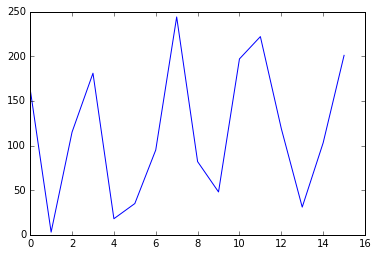

In [96]:
plt.plot([x for x in g.get_block()])

In [97]:
struct.unpack("IIII", g.get_block()) + struct.unpack("IIII", g.get_block())

(4085495639,
 2869967742,
 2861290751,
 2038444781,
 615907261,
 3265594187,
 2646272681,
 157419562)

In [98]:
g.get_list(20)

[571152078,
 285185580,
 2892466312,
 2021051564,
 3679402240,
 1889237252,
 2365168373,
 2596715418,
 3444575897,
 3447298449,
 4017880469,
 2515486993,
 127486461,
 3821591992,
 876430975,
 2660365112,
 4238764989,
 1540523713,
 3503026736,
 3273444612,
 2514639870,
 3993317096,
 1440632010,
 190578363,
 1864640889,
 3169688596,
 3062453910,
 4094095890,
 2418479838,
 3089056059,
 2980499930,
 3195745503,
 2563545410,
 756663899,
 3764509428,
 3061167978,
 2755063784,
 449450506,
 2912099557,
 459178723]

In [100]:
g.rand_to_file(100, 'rands.txt')

In [87]:
sp13_11 = pd.read_csv('out/speed_t4_dt14_m10_s555.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0be5c0b8>]], dtype=object)

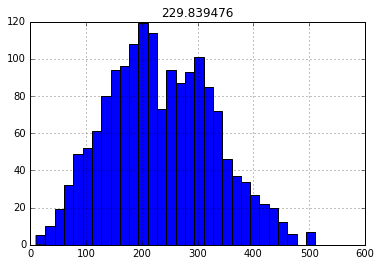

In [88]:
sp13_11.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd06fe47f0>]], dtype=object)

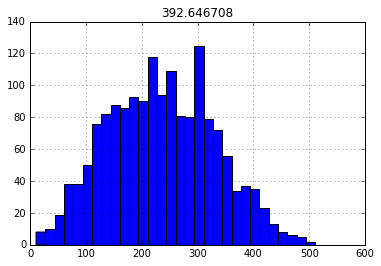

In [89]:
sp_clamp = pd.read_csv('out/speed_t4_dt14_m10_s554.csv')
sp_clamp.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd06f26ac8>]], dtype=object)

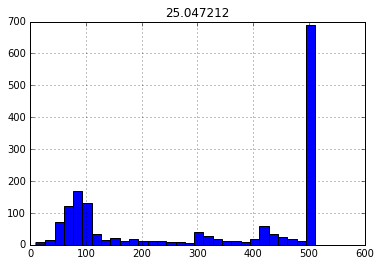

In [90]:
sp_clamp = pd.read_csv('out/speed_t4_dt14_m10_s104.csv')
sp_clamp.hist(bins=30)

In [193]:
hep = pd.read_csv('out/hep_t4_dt14_m11_s555_e1000.csv', sep='\t', header=None)
hep.shape
# sp_clamp.hist(bins=30)

(201, 4)

In [194]:
vel = np.diff(hep, axis=0)
spd = norm(vel, 1)

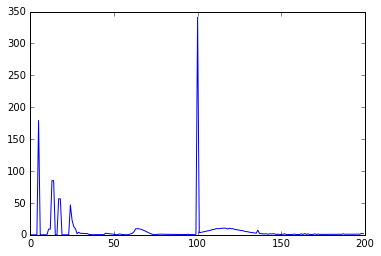

In [195]:
plt.plot(spd)

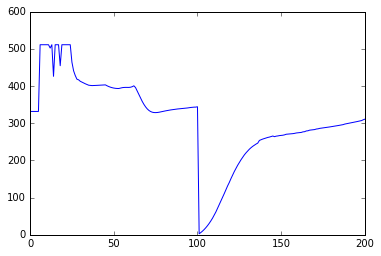

In [196]:
plt.plot(hep[3])

In [187]:
data = pd.read_csv('out/data_t4_dt14_m11_s555_e1000.csv', sep='\t')
data.head()

,time [s],separation [m],mean speed [m/s],quad loop time [ns]
0,1.000000e-14,NaN,315.9000,64645200.0
1,2.000000e-14,NaN,333.3601,61023860.0
2,3.000000e-14,NaN,345.0150,64137660.0
3,4.000000e-14,NaN,358.6783,65196660.0
4,5.000000e-14,NaN,365.2064,64892340.0


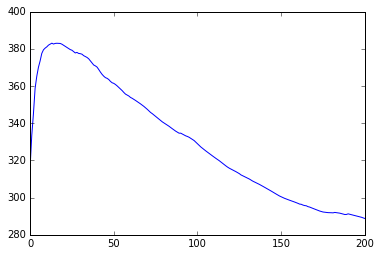

In [188]:
plt.plot(data['mean speed [m/s]'])

In [128]:
path = './data/core5_1en14_2en9/bogo3.txt'
# with open('./data/core5_1en14_2en9/bogo1.txt', 'r') as infile:
#     bogo = infile.readlines()
num_spds = 1656
bogo = pd.read_csv(path, header=None)
bogo.shape

(207327, 1)

In [83]:
mask = bogo[0].str.find('Time')


In [172]:
idxs = bogo.index[mask >=0]

In [174]:
idxs[-1] - idxs[-2]

3991

In [84]:
start = bogo.index[mask >=0][-1]+1

In [85]:
bogo[-1656:].head()

,0
205671,232.169649
205672,209.955610
205673,251.186667
205674,54.994616
205675,123.843749


In [162]:
paths = glob.glob('./data/core5_1en14_2en9/bogo*')
bogos = [pd.read_csv(p, header=None)[-num_spds:] for p in paths]
bogos = [pd.to_numeric(b[0]) for b in bogos]
arys = [np.array(b).reshape(-1,1) for b in bogos]

In [163]:
type(bogos[0])

pandas.core.series.Series

In [164]:
mean_spds = pd.Series(np.mean(np.concatenate(arys, axis=1), axis=1))
mean_spds.shape

(1656,)

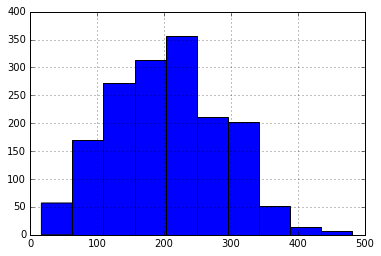

In [165]:
bogos[2].hist()

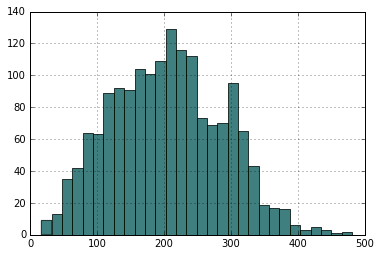

In [169]:
mean_spds.hist(bins=30, alpha=0.5)
bogos[2].hist(bins=30, alpha=0.5)

In [175]:
bogos[0].to_csv('data/mean_spd.csv')

In [184]:
m = 2.1801714e-25
j_to_kev = 6.242e+15
v = 250 #m/s

In [186]:
j_to_kev * .5 * m *v**2 

4.252696837125e-05

In [199]:
(2*10/ j_to_kev/m)**.5

121229.35557946764